### Welcome to lab 4: Data analysis with Python
### For this lab we will be using the data from tutorial 8, which contains key financial information for USA

### While the basic version of Python has a lot of great functions, oftentimes you will find yourself needing more sophisticated tools
### There exist many packages that can help you with data analysis and today we will be looking at and use some of the basics

### Pandas is your go-to for anything related to data; it is a great package for structuring data as a matrix and helps with basic data manipulation
### numpy is a library that contains many very useful functions for matrix and vectorised data

In [58]:
import pandas as pd 

### Matplotlib is Python's attempt at ggplot2 and allows you to produce graphs
### seaborn is a similar library made specifically for visualising statistical data

In [59]:
import matplotlib.pyplot as plt

### statsmodels is a library for some more "traditional" statistical analysis
### There are many more like scipy (mathematics, science, engineering) and scikit-learn (machine learning)

In [60]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.tools import diff
from sklearn import linear_model

### Some packages have rather long names, which is cumbersome when you want to call functions within the package, so you can give them an alias via the "as" statement

### Set up your working directory and data

In [61]:
data = 'lesson8_data.xls'

### let's load the data into a data frame using pandas

In [62]:
df = pd.read_excel(data)

### pandas can handle most data types available, such as csvs (any delineation), xlsx (excel), dta (stata), and so on
### now let's have a look at the data inside the data frame
### the .head() method returns the first five entries in your data frame

In [63]:
df_head = df.head() 

### for small data such as this isn't super useful, but once the data gets large it might be helpful to inspect a small subset first

### if you want to get the columns of the data frame, you can call on the columns property

In [64]:
df.columns

Index(['DATE', 'FFR', 'Tbill', 'Tb1yr', 'r5', 'r10', 'PPINSA', 'Finished',
       'CPI', 'CPICORE', 'M1NSA', 'M2SA', 'M2NSA', 'Unemp', 'IndProd', 'RGDP',
       'Potent', 'Deflator', 'Curr'],
      dtype='object')

### the .describe() method gives you the basic summary statistics for numeric columns

In [65]:
df.describe()

,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,5.545755,5.032547,5.578774,6.245047,6.541321,98.845896,99.974245,113.182028,61.489858,754.642877,9409.788208,3136.539953,6.081981,60.751840,7664.750472,7764.872170,61.529608,327.911844
std,3.515244,2.993406,3.178313,2.888455,2.690470,50.408646,49.133170,65.310267,31.866973,544.198580,7944.482470,2647.971988,1.614394,23.479552,3390.652274,3511.536714,31.594753,309.019367
min,0.070000,0.010000,0.110000,0.670000,1.640000,31.470000,33.200000,29.400000,18.920000,138.400000,896.100000,299.400000,3.400000,22.130000,2800.200000,2824.200000,18.521000,31.830000
25%,3.247500,3.077500,3.530000,4.120000,4.297500,44.015000,44.710000,43.705000,27.227500,253.097500,2469.775000,825.270000,4.970000,41.550000,4818.650000,4706.400000,27.721750,66.345250
50%,5.250000,4.955000,5.440000,6.020000,6.180000,103.350000,104.330000,109.635000,61.960000,665.300000,7848.100000,2614.835000,5.715000,55.200000,7078.950000,7141.400000,62.964500,198.812500
75%,7.395000,6.412500,7.302500,7.772500,7.945000,128.447500,133.885000,167.507500,89.822500,1134.432500,13640.550000,4536.955000,7.130000,86.425000,10859.225000,10596.050000,87.074750,544.728750
max,17.780000,15.050000,16.320000,15.430000,14.850000,203.830000,196.200000,231.280000,114.180000,2436.730000,30938.800000,10319.600000,10.670000,100.510000,13665.400000,14505.400000,116.089000,1147.623000


### since we have quite a few columns it is a bit hard to read
### let's just look at individual columns first
### you can subset the data to a single column first

In [66]:
df['FFR'].describe()

count    212.000000
mean       5.545755
std        3.515244
min        0.070000
25%        3.247500
50%        5.250000
75%        7.395000
max       17.780000
Name: FFR, dtype: float64

### if you are only looking at a single column you can just put it in brackets
### if you want more than one column, you need to input them as a list

In [67]:
df[['FFR', 'Tbill']].describe()

,FFR,Tbill
count,212.000000,212.000000
mean,5.545755,5.032547
std,3.515244,2.993406
min,0.070000,0.010000
25%,3.247500,3.077500
50%,5.250000,4.955000
75%,7.395000,6.412500
max,17.780000,15.050000


### naturally you can subset using the columns command we used earlier

In [68]:
df[df.columns[:4]].describe()

,FFR,Tbill,Tb1yr
count,212.000000,212.000000,212.000000
mean,5.545755,5.032547,5.578774
std,3.515244,2.993406,3.178313
min,0.070000,0.010000,0.110000
25%,3.247500,3.077500,3.530000
50%,5.250000,4.955000,5.440000
75%,7.395000,6.412500,7.302500
max,17.780000,15.050000,16.320000


### if you want to get a specific cell in the matrix you can use the .loc[] or .iloc[] methods

In [69]:
df.loc[1,'FFR'] 

3.7

### you can also retrieve the entirety of multiple columns if you want and save them as a new df

In [70]:
df_new = df.loc[:,['FFR', 'Tbill']] 

### next, let's try to do some more complicated subsetting of the data
### for example, what if we want the rows that are either the minimum or the maximum value for Unemp column?

In [71]:
max_unemp = df['Unemp'].max()
min_unemp = df['Unemp'].min()
mean_unemp = df['Unemp'].mean()
median_unemp = df['Unemp'].median()
sd_unemp = df['Unemp'].std()
var_unemp = df['Unemp'].var()
var_unemp2 = sd_unemp**2

In [72]:
df_max = df[df['Unemp'] == max_unemp]
df_min = df[df['Unemp'] == min_unemp]

In [73]:
df_min_max = df[(df['Unemp'] == max_unemp) | (df['Unemp'] == min_unemp)]

### You can create quite complex conditions to subset your data
### A lot of the methods discussed during the first lab, such as for and while loops, also work on DataFrames!
### However, pandas offers some inherent tools that make this much easier

In [74]:
for index, row in df.iterrows():
    print(df.loc[index,'FFR'] + 2)

5.93
5.7
4.9399999999999995
4.3
4.0
3.73
3.6799999999999997
4.4
4.46
4.609999999999999
4.85
4.92
4.970000000000001
4.96
5.33
5.45
5.46
5.49
5.46
5.58
5.970000000000001
6.08
6.07
6.17
6.56
6.91
7.41
7.56
6.82
5.99
5.890000000000001
6.17
6.79
7.98
7.94
7.92
8.57
10.33
10.98
10.94
10.57
9.879999999999999
8.7
7.57
5.859999999999999
6.56
7.47
6.75
5.54
6.3
6.74
7.14
8.54
9.82
12.56
12.0
11.32
13.25
14.09
11.35
8.3
7.42
8.16
7.41
6.83
7.2
7.28
6.87
6.66
7.16
7.82
8.51
8.76
9.280000000000001
10.1
11.58
12.07
12.18
12.95
15.58
17.05
14.69
11.84
17.85
18.57
19.78
19.58
15.59
16.23
16.509999999999998
13.01
11.29
10.65
10.8
11.46
11.43
11.69
12.56
13.39
11.27
10.48
9.92
9.9
10.1
9.83
8.92
8.21
8.27
8.219999999999999
8.65
8.84
8.92
8.66
9.16
9.98
10.47
11.44
11.73
11.08
10.61
10.25
10.24
10.16
9.74
8.43
7.86
7.64
6.82
6.02
5.77
5.26
5.04
5.04
5.0
5.0600000000000005
4.99
5.21
5.9399999999999995
6.49
7.17
7.81
8.02
7.8
7.72
7.36
7.24
7.31
7.28
7.28
7.52
7.53
7.51
7.52
7.5
7.53
6.86
6.73
6.75
7.09
7.

### The iterrows function allows you to iterate over the rows of the DataFrame
### However, iterating over rows is usually not very efficient and the .apply() function can achieve the same much faster

In [75]:
df['FFR'].apply(lambda x: x+2)

0      5.93
1      5.70
2      4.94
3      4.30
4      4.00
       ... 
207    2.07
208    2.10
209    2.15
210    2.14
211    2.16
Name: FFR, Length: 212, dtype: float64

### You can use the the apply function to make easy booleans for subsetting

In [76]:
df['unemployment_max'] = df['Unemp'].apply(lambda x: x == max_unemp)

### Now that we have discussed the fundamentals of working with data, let's try visualise the data

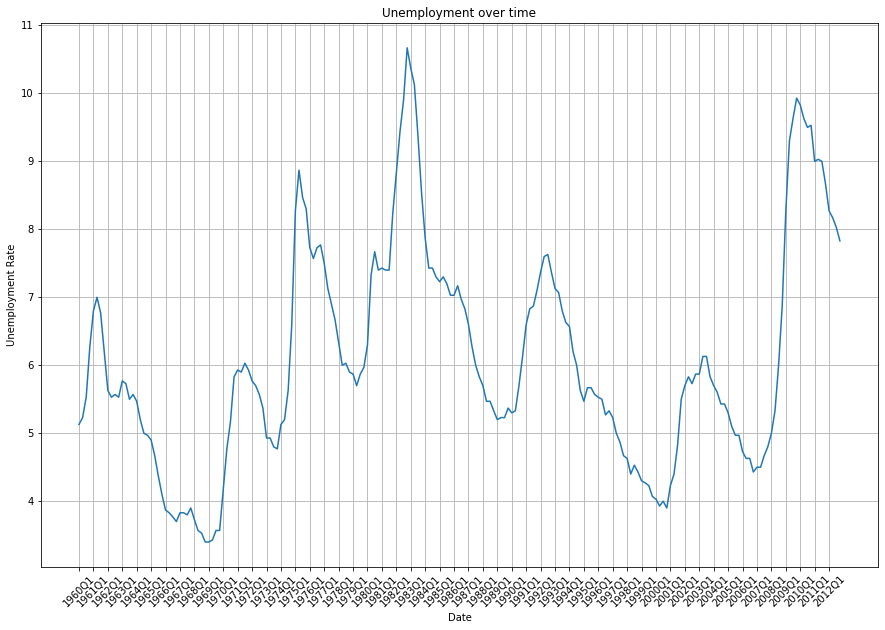

In [77]:
fig = plt.figure(0,  figsize = [15,10]) ### Figuratively, plt.fig starts a "canvas" for you to plot on
ax = fig.add_subplot() ### The actually plotting happens on a subplot of the figure
ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Rate')
ax.set_title('Unemployment over time')
ax.plot(df['DATE'], df['Unemp']) ### Here we select the data for our x and y lables
ax.xaxis.set_tick_params(rotation=45)
new_x_ticks = [x for x in list(df['DATE']) if "Q1" in x] ### If we use all the date lables for the x ticks, it would be too packed! 
ax.set(xticks = new_x_ticks)
ax.grid(True)
fig.show()

### Next, let's try to run a plain OLS regression on the data
### Since the purpose of this lab is to familiarise you with Python, I will not be covering how to analyse the data proper
### Instead, I will be showing you how to implement some methods that you have seen in class
### For a proper analysis using this data have a look at tutorial 8
### First, let's see if we can see some correlation between Unemployment and the Tbill 

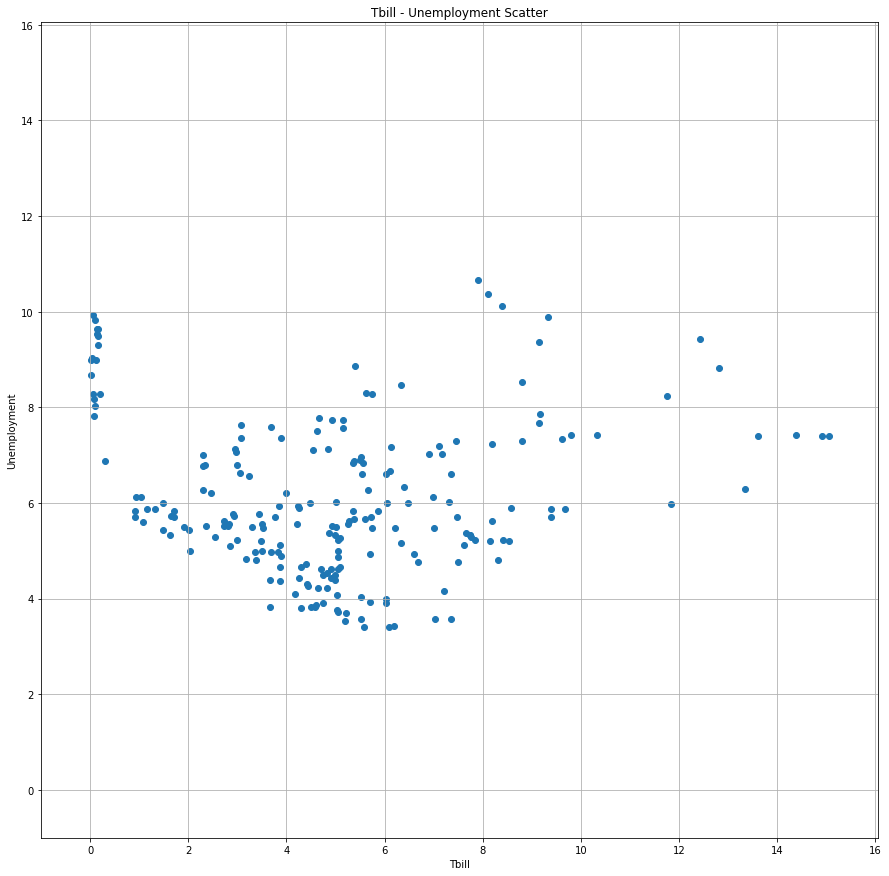

In [78]:
lim_val = max(df['Tbill'].max(),df['Unemp'].max())+1
fig1 = plt.figure(1,  figsize = [15,15]) 
ax1 = fig1.add_subplot()
ax1.set_xlabel('Tbill')
ax1.set_ylabel('Unemployment')
ax1.set_xlim([-1,lim_val])
ax1.set_ylim([-1,lim_val])
ax1.set_title('Tbill - Unemployment Scatter')
ax1.scatter(df['Tbill'], df['Unemp']) 
ax1.grid(True)

### It looks like higher values of Tbill are not really associated with higher values of Unemployment! We get some clusters of low Tbill and high unemployment as well (probably monetary easing)
### Mean unemployment seemsto be around 6
### Let's see what OLS will return to us

In [79]:
Y = df['Unemp']
X = df['Tbill']
X = sm.add_constant(X)
reg = sm.regression.linear_model.OLS(Y, X, hasconst = True)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Unemp   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                 0.0003423
Date:                Fri, 23 Apr 2021   Prob (F-statistic):              0.985
Time:                        14:09:15   Log-Likelihood:                -401.85
No. Observations:                 212   AIC:                             807.7
Df Residuals:                     210   BIC:                             814.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0854      0.218     27.942      0.000       5.656       6.515
Tbill         -0.0007      0.037     -0.019      0.985      -0.074       0.073
==============================================================================
Omnibus:                       14.088   Durbin-Watson:                   0.044
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.625
Skew:                           0.664   Prob(JB):                     0.000405
Kurtosis:                       2.939   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### As you can see form the summary results, the fit of the model is pretty egregious
### You can do the same regression using scikit learn

In [80]:
model = linear_model.LinearRegression()
reg_sk = model.fit(X, Y)
reg_sk.coef_
reg_sk.intercept_

6.085446172349059

### Let's try to demean and first difference the data
### There are many ways to do this, but two ways are

In [81]:
df['Unemp_mean_sub'] = df['Unemp'].apply(lambda x: x - df['Unemp'].mean())
df['Tbill_mean_sub'] = df['Tbill'] - df['Tbill'].mean()

### It would be possible to first difference by iterating over the rows of the DataFrame, but luckily the statsmodel has a fucntion that does that for us

In [82]:
df['Unemp_fd'] = diff(df['Unemp'], k_diff = 1)
df['Tbill_fd'] = diff(df['Tbill'], k_diff = 1)

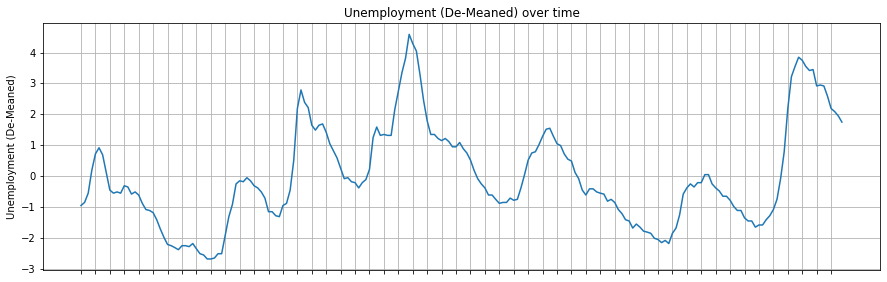

In [83]:
fig2 = plt.figure(2,  figsize = [15,10])
ax2 = fig2.add_subplot(211) ### The three-digit number here indicates the number of rows, the number of columns, and the index number of the subplot ###
ax2.set_ylabel('Unemployment (De-Meaned)')
ax2.set_title('Unemployment (De-Meaned) over time')
ax2.plot(df['DATE'], df['Unemp_mean_sub'])
ax2.xaxis.set_tick_params(rotation=45)
ax2.set(xticks = new_x_ticks)
ax2.grid(True)
ax2.tick_params(labelbottom=False)

In [84]:
ax3 = fig2.add_subplot(212)
ax3.set_xlabel('Date')
ax3.set_ylabel('Unemployment (First Differenced)')
ax3.set_title('Unemployment (First Differenced) over time')
ax3.plot(df['DATE'], df['Unemp_fd'], c = 'r')
ax3.xaxis.set_tick_params(rotation=45)
ax3.set(xticks = new_x_ticks)
ax3.grid(True)

### The de-meaned values don't look very stationary, but the fd values look more promising! Let's do a simple regression on each

In [85]:
Y2 = df['Unemp_mean_sub']
X2 = df['Tbill_mean_sub']
X2 = sm.add_constant(X2)
reg2 = sm.regression.linear_model.OLS(Y2, X2, hasconst = True)
results2 = reg2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Unemp_mean_sub   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                 0.0003423
Date:                Fri, 23 Apr 2021   Prob (F-statistic):              0.985
Time:                        14:09:16   Log-Likelihood:                -401.85
No. Observations:                 212   AIC:                             807.7
Df Residuals:                     210   BIC:                             814.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.181e-16      0.111   3.76e-15      1.000      -0.219       0.219
Tbill_mean_sub    -0.0007      0.037     -0.019      0.985      -0.074       0.073
==============================================================================
Omnibus:                       14.088   Durbin-Watson:                   0.044
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.625
Skew:                           0.664   Prob(JB):                     0.000405
Kurtosis:                       2.939   Cond. No.                         2.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
Y3 = df['Unemp_fd']
X3 = df['Tbill_fd']
X3 = sm.add_constant(X3)
reg3 = sm.regression.linear_model.OLS(Y3, X3, missing = 'drop', hasconst = True)
results3 = reg3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Unemp_fd   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     51.32
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           1.32e-11
Time:                        14:09:16   Log-Likelihood:                -47.039
No. Observations:                 211   AIC:                             98.08
Df Residuals:                     209   BIC:                             104.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0092      0.021      0.440      0.660      -0.032       0.050
Tbill_fd      -0.2003      0.028     -7.164      0.000      -0.255      -0.145
==============================================================================
Omnibus:                       60.536   Durbin-Watson:                   0.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.868
Skew:                           1.198   Prob(JB):                     1.44e-39
Kurtosis:                       6.822   Cond. No.                         1.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[[<matplotlib.axis.XTick at 0x7f2b82fc9ad0>,

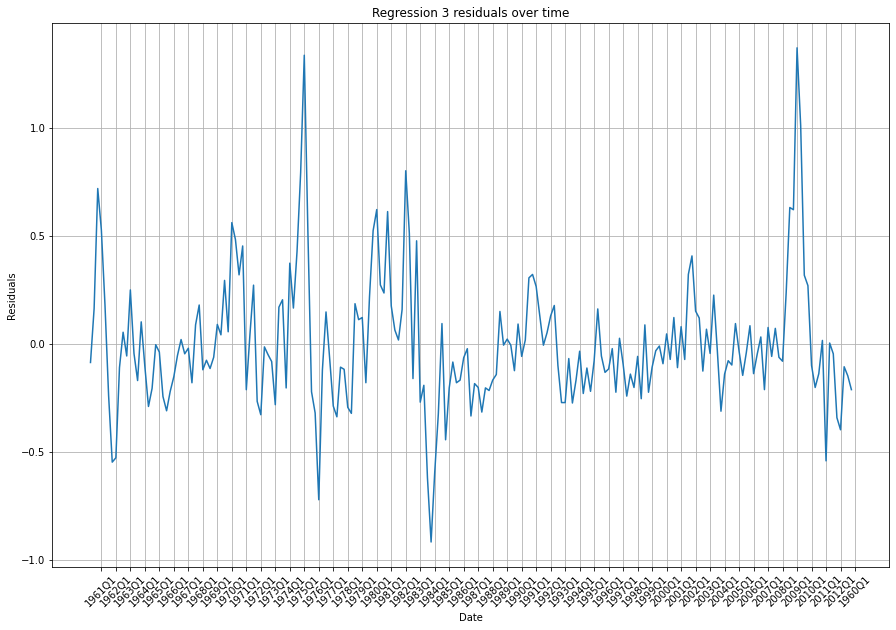

In [87]:
fig3 = plt.figure(3,  figsize = [15,10])
ax3 = fig3.add_subplot()
ax3.set_xlabel('Date')
ax3.grid(True)
ax3.set_xlabel('Date')
ax3.set_ylabel('Residuals')
ax3.set_title('Regression 3 residuals over time')
ax3.plot(df['DATE'][1:], results3.resid)
ax3.xaxis.set_tick_params(rotation=45)
ax3.set(xticks = new_x_ticks)

### This looks much better and we might have a chance to use this data!
### The next step would be to use the Augmented Dickey Fuller test to check for stationarity, which you can find in the code for tutorial 8
### This concludes lab 4 and I wish you best of luck on the exams!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c529b230-40c3-4e30-a486-ecc83c52038f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>